In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

plt.rcParams['font.family'] = 'Malgun Gothic'

import math
# 코드 참고 https://hongl.tistory.com/100

In [33]:
data = pd.read_csv('./sample_dataset.csv', encoding = 'cp949')
data.drop(columns=['id', 'member_id'], inplace=True)
data.drop(columns=['url', 'desc'], inplace=True)

In [67]:
data = data.iloc[:199999]
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,2500.0,2500.0,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,30000.0,30000.0,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000.0,5000.0,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,4000.0,4000.0,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000.0,30000.0,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Modified Z-score

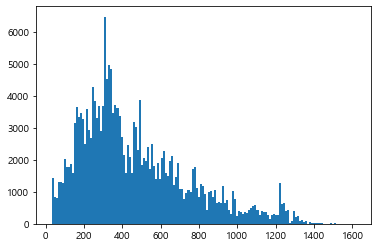

In [76]:
## data_dti로 modified z-score 구하기 
data_dti = data['installment']
plt.hist(data_dti, bins=150)
# plt.xlim([0, 100])
plt.show()

In [69]:
# 원본 데이터
data_dti
# 소실된 데이터 개수 찾기
data_dti.isna().sum() 
# Na 처리하기  
data_drop_dti = data_dti.dropna()
data_drop_dti

0           84.92
1          777.23
2          180.69
3          146.51
4          731.78
           ...   
199994     341.13
199995     208.92
199996     304.72
199997     312.63
199998    1146.85
Name: installment, Length: 199999, dtype: float64

In [70]:
import numpy as np
def modified_z_score(input_data):
    # 01. median 계산 
    median_input_data = np.median(input_data)
    
    # 02. MAD 계산 (Median Absolute Deviation)
    # 모든 x 값에 대해서 중앙 값과의 편차를 구한 값 중 중앙 값 
    mad = np.median(input_data.map(lambda x: np.abs(x - median_input_data)))
    
    # 03. Modified Z-score 구하기 
    # 0.6745 * (각 x들과 중앙값 편차) / MAD 
    modified_z_score = list(input_data.map(lambda x: 0.6745* (x - median_input_data) / mad))
    return modified_z_score
modified = modified_z_score(data_drop_dti)

In [81]:
threshold = 3.5
cnt = 0
outliers = []
for num in modified:
    if abs(num) >= threshold:
        cnt += 1 
        outliers.append(num)

print(cnt/200000,'개 outliers가 존재합니다.')
print(outliers)

0.008545 개 outliers가 존재합니다.
[3.567944661805679, 3.6649072855533817, 3.7095700693579943, 3.5217624636907936, 3.575501748769933, 3.7468756891339137, 3.967590609994665, 3.6649072855533817, 3.6352787065030525, 3.7468756891339137, 3.7095700693579943, 3.8373208251822875, 3.7095700693579943, 3.6354786294386154, 3.6649072855533817, 3.7095700693579943, 3.5217624636907936, 3.7468756891339137, 3.5217624636907936, 3.7468756891339137, 4.083905773904795, 3.952796312763056, 3.7468756891339137, 3.6354786294386154, 3.5217624636907936, 3.6354786294386154, 3.6354786294386154, 3.5071680893947472, 3.7468756891339137, 3.7468756891339137, 3.7468756891339137, 3.6649072855533817, 3.5217624636907936, 3.7468756891339137, 3.6649072855533817, 3.7468756891339137, 4.083905773904795, 3.5217624636907936, 3.7144881735728257, 4.083905773904795, 3.5217624636907936, 3.5217624636907936, 3.7468756891339137, 3.5217624636907936, 3.7095700693579943, 3.5217624636907936, 3.645074930345604, 3.5485121524690264, 3.645074930345604, 